## Hierarchical Clustering of Channels

![alt text](images/hierarch zoomed in.png "subtitle")

### Table of Contents ###
> Part 1: [Exploratory Analysis]()

> Part 2: [Discovering Channel Keywords](http://localhost:8888/notebooks/Portfolio/Text%20Mining%20on%20Slack%20App/)

> **Part 3: [Channel Clustering]**
 * [Importing Data and Libraries](#Importing Data and Libraries)
 * [Hierarchical Clustering](#Hierarchical Clustering)

> Part 4: [Sentiment Analysis]()
    

In this demo, we will cluster channels where people talk about similar things! Hope that diagram above was a bit of a teaser for what is to come :P We'll do a [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering) using cosine similarity on our document term matrix, where all chats in a channel is considered a document. 

### Importing Data and Libraries

In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import os
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from scipy.cluster.hierarchy import ward, dendrogram
%matplotlib inline
import pandas as pd

data = pd.read_csv('concatenated.csv')
channel_text = data.groupby('channel')['text']

We will screen for channels with more than fifty posts. 
Channels are the list of channels that meet this criteria. 
Text list is a list of the associated text.

In [48]:
morethanfourty = data.groupby('channel').filter(lambda x: len(x) >= 40)
morethanfourty = morethanfourty.groupby('channel')['text']

channels = [channel[0] for channel in morethanfourty]
text_list = [channel[1] for channel in morethanfourty] 

A sample of what text looks like in a channel. Just the first five hundred characters. It's for privacy of our classmates.

In [56]:
list_joined_text = []
for text_ in text_list:
    concatenated = ""
    for text in text_:
        concatenated += ''.join(str(text) + ' ')
    list_joined_text.append(concatenated)
    
list_joined_text[30][0:500]

"I haven't played in a long time, but I'm up for tennis!! I have a couple of extra rackets I could bring :) I think i have an extra as well. What's better for everyone? Tomorrow or Friday? Friday is a little better for me Friday is better for me too! Are there courts on campus? I have not played in forever either and am a real beginner. Was just starting to learn before I moved here. <@U1L2QDX7Y> could I borrow a racket? I'd be down for Friday after class. <@U1KQTJ6BV>: there are courts outside c"

### Hierarchical Clustering

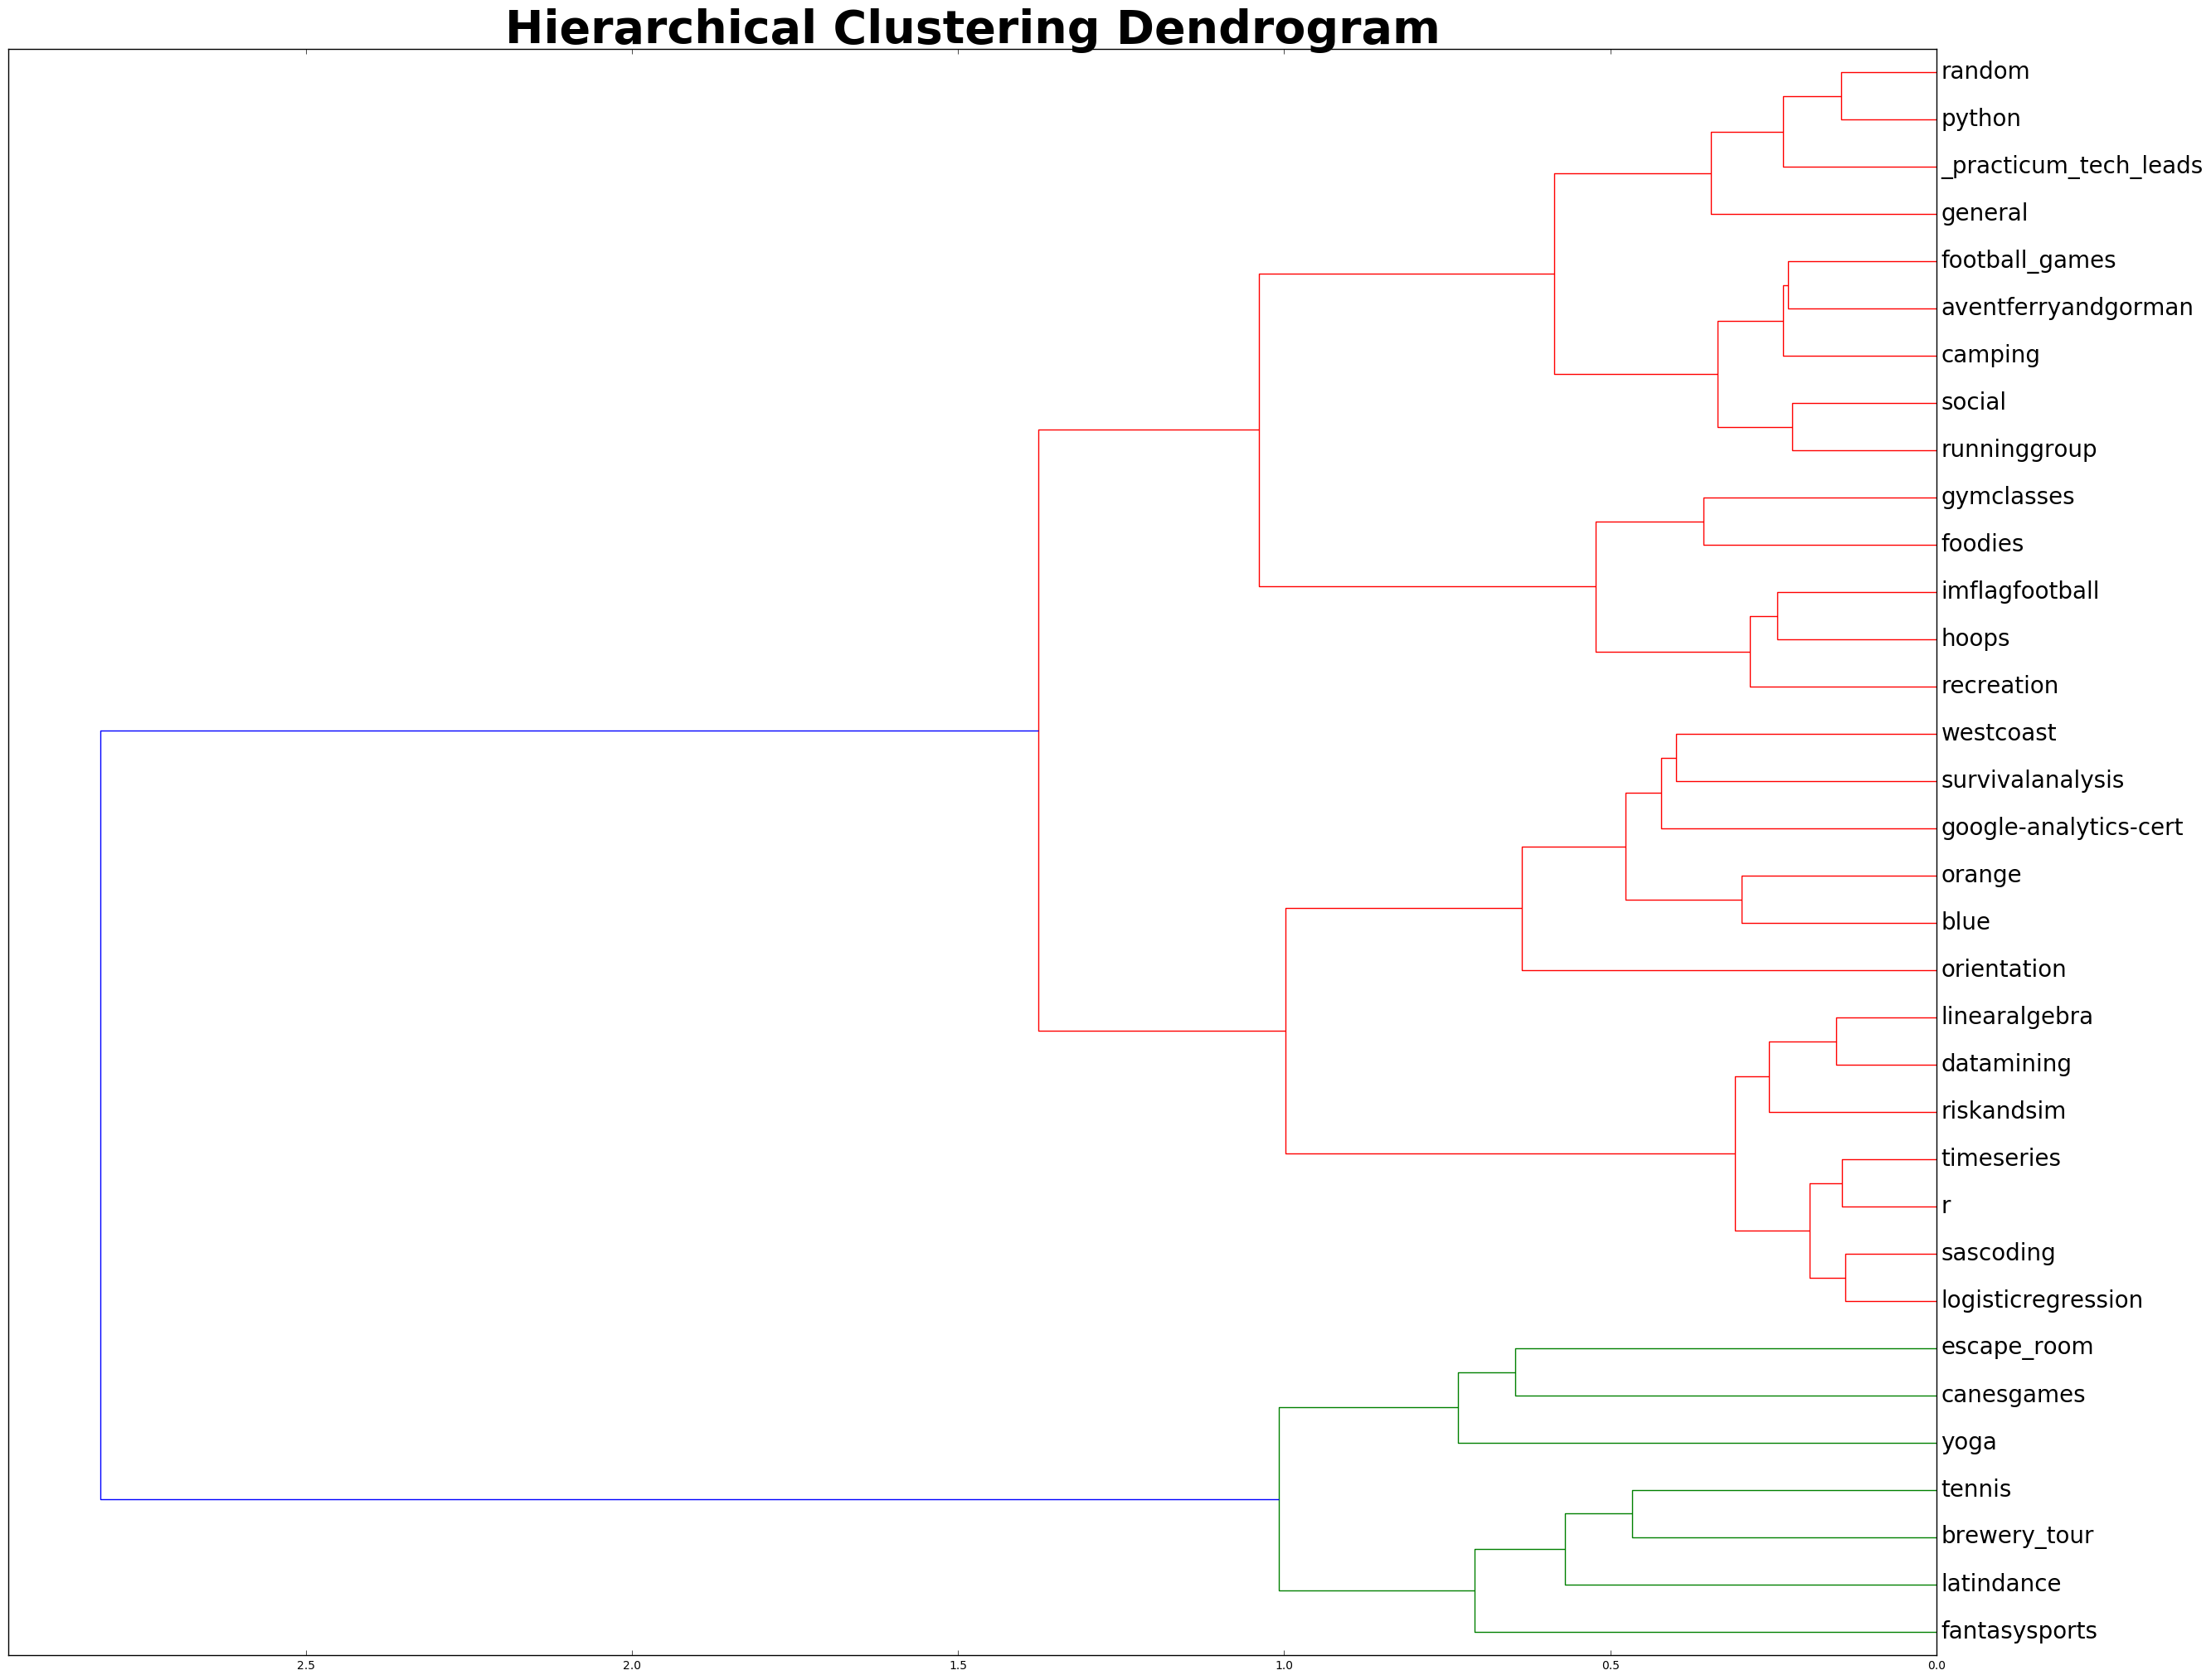

In [57]:
from scipy.cluster import hierarchy

vectorizer = CountVectorizer(input = 'content', analyzer='word')
dtm = vectorizer.fit_transform(list_joined_text)
dtm = dtm.toarray()

vocab = vectorizer.get_feature_names()
vocab = np.array(vocab)

dist = 1 - cosine_similarity(dtm)

mds = MDS(n_components = 2, dissimilarity = "precomputed", random_state=1)
pos = mds.fit_transform(dist)

xs, ys = pos[:, 0], pos[:, 1]

linkage_matrix = ward(dist)

plt.figure(figsize=(30, 25))
plt.title('Hierarchical Clustering Dendrogram', fontsize = 40, weight = 'bold')

dn = dendrogram(linkage_matrix, p = 1, orientation='left',
           labels = channels, leaf_font_size=20) 

plt.show()



The hierarchical clustering produced clusters of channels that intuitively belong together. The _academic_ channels - logistic regression, linear algebra, sascoding, data mining, time series and risk and simulation - went together. So did some of the sports channels - hoops, flag football, recreation, and gym classes. A cluster talked about group activities - camping, football games, running, and social. Homework and project groups - communication project, practicum, homework teams. <br/>
<br/> There were some clusterings that were surprising though. Python was expected to be grouped with SAS and R, but was actually computed to be closer to random. It was also ironic that foodies and gym classes were grouped together. <br>